# Regression


<br/>
<br/>
<center>
<img src="images/underfitting_overfitting.png" width="800">
</center>

This lecture will discuss basic types of regression algorithms and explore strategies for optimizing and improving regression models. The focus will be on linear and pseudo/generalized linear problems, with some limited examples of non-linear regression.

* Regression basics
    - Problem statement for regression
    - Properties of error distributions
    - Accuracy metrics

* Improving models by adding features
    - Generating non-linear features
    - Colinearity of features
    - Principal Component Regression and Partial Least Squares
    - Regularization of coefficients
    - Kernel ridge regression

* Improving performance by changing models
    - Non-linear regression
    - Neural networks
    - kNN regression

* Quantifying uncertainty
    - Standard deviation of error
    - Ensembles from re-sampling
    - Gaussian process regression

## Regression basics

### Regression problem statement

$\vec{y} = f(\vec{x}) + \vec{\epsilon}$

where the output, $\vec{y}$, is a vector (or scalar) of continuous, real values, $f$ is the model, $\vec{x}$ is a vector (or scalar) of input features, and $\vec{epsilon}$ is an error between the real and predicted values. It is common to write the predicted values as $\vec{\hat{y}}$:

$\vec{\hat{y}} = f(\vec{x})$

such that $\vec{\epsilon}$ = $\vec{y} - \vec{\hat{y}}$.

The goal of regression is to minimize the error, $\vec{\epsilon}$.

### Properties of error distributions

The distribution of errors, or "residuals" contains a lot of information about the performance of a model. There are two common classes of error distributions:

* Normal (or Gaussian) vs. Non-normal error distributions


Determined by how well the error distribution is described by the Gaussian probability distribution:

<center>
<img src="images/normal_distribution.png" width="500">
</center>

* Homoskedastic vs. Heteroskedastic error distributions

Homoskedastic error distributions are *constant in the independent variables (features)*, while heteroskedastic errors vary across the input space:

<center>
<img src="images/heteroskedastic.gif" width="500">
</center>

Least-squares regression and many other regression models *assume* that errors are normally-distributed and homoskedastic.

### Accuracy metrics

It is important to consider the context of a regression model and choose accuracy metrics that are relevant to its application. There are several common options:

* #### Mean absolute error (MAE)

$MAE = \frac{1}{N} \sum_{i=0}^N |y_i - \hat{y}_i|$

* #### Root-mean-sqaured error (RMSE)

$RMSE = \sqrt{\frac{1}{N} \sum_{i=0}^N (y_i - \hat{y}_i)^2}$

MAE and RMSE are very similar. Both have units of the dependent variable ($y$), and can vary from 0 to $\infty$ with lower values being better. MAE is less affected by outliers and sample size, but it is always lower than RMSE, so it is a less conservative estimate. MAE and RMSE are related by the inequalities:

$MAE \leq RMSE \leq MAE \times \sqrt{N}$

* #### $R^2$ value

The $R^2$ metric is very common in regression models, and is the default "score" in `scikit-learn`. $R^2$ varies from 0-1, with higher values corresponding to better models. The $R^2$ value corresponds to the amount of variance in the independent variable that is explained by the model, and is defined as:

$R^2 = \frac{\sum_{i=0}^N (y_i - \bar{y})^2 - \sum_{i=0}^N (y_i - \hat{y})^2}{\sum_{i=0}^N (y_i - \bar{y})^2}$

where $\bar{y}$ is the mean of $y$. This is often written as:

$R^2 = \frac{SST - SSE}{SST}$

where $SST = \sum_{i=0}^N (y_i - \bar{y})^2$ and $SSE = \sum_{i=0}^N (y_i - \hat{y})^2$

* #### Parity plots

Plotting $y$ vs. $\hat{y}$ provides a visual analysis of the error.

* #### Maximum error

Sometimes it is useful to assess the maximum error of a model, $max(\epsilon_i)$. This is useful to assess a worst-case scenario, and provides a conservative estimate of model performance.

### Question: How could you replicate the behavior of a model with $R^2 =0$ using a single parameter?

### Exercise: Anscomb's Quartet

In [1]:
import numpy as np

x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

In [2]:
def calc_stats(x,y):    
    y_bar = np.mean(y)
    y_std = np.std(x)
    m, b = np.polyfit(x,y,deg=1)
    SST = sum((y - y_bar)**2)
    SSE = sum((y - (m*x+b))**2)
    R2 = (SST - SSE)/SST
    return y_bar, y_std, m, b, R2

stats1 = calc_stats(x,y1)
print("Dataset 1: mean={:.2f}, stdev={:.2f}, m={:.2f}, b={:.2f}, R2={:.2f}".format(*stats1))
stats2 = calc_stats(x,y2)
print("Dataset 2: mean={:.2f}, stdev={:.2f}, m={:.2f}, b={:.2f}, R2={:.2f}".format(*stats2))
stats3 = calc_stats(x,y3)
print("Dataset 2: mean={:.2f}, stdev={:.2f}, m={:.2f}, b={:.2f}, R2={:.2f}".format(*stats3))
stats4 = calc_stats(x4,y4)
print("Dataset 2: mean={:.2f}, stdev={:.2f}, m={:.2f}, b={:.2f}, R2={:.2f}".format(*stats4))
avg, std, m, b, r2 = stats1

Dataset 1: mean=7.50, stdev=3.16, m=0.50, b=3.00, R2=0.67
Dataset 2: mean=7.50, stdev=3.16, m=0.50, b=3.00, R2=0.67
Dataset 2: mean=7.50, stdev=3.16, m=0.50, b=3.00, R2=0.67
Dataset 2: mean=7.50, stdev=3.16, m=0.50, b=3.00, R2=0.67


All of the statistics are identical for these datasets, and the $R^2$ implies that linear regression describes the same amount of variance in all cases!

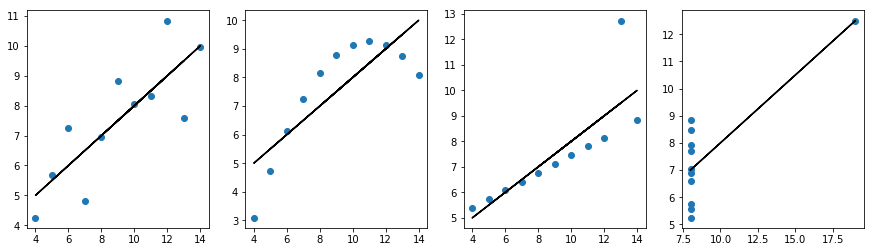

In [3]:
%matplotlib inline
import pylab as plt
fig, axes = plt.subplots(1,4,figsize=(15,4))
yhat = m*x + b
axes[0].scatter(x,y1)
axes[0].plot(x, yhat, ls='-', color='k')
axes[1].scatter(x,y2)
axes[1].plot(x, yhat, ls='-', color='k')
axes[2].scatter(x,y3)
axes[2].plot(x, yhat, ls='-', color='k')
axes[3].scatter(x4,y4)
axes[3].plot(x4, m*x4 + b, ls='-', color='k')

Parity plots:

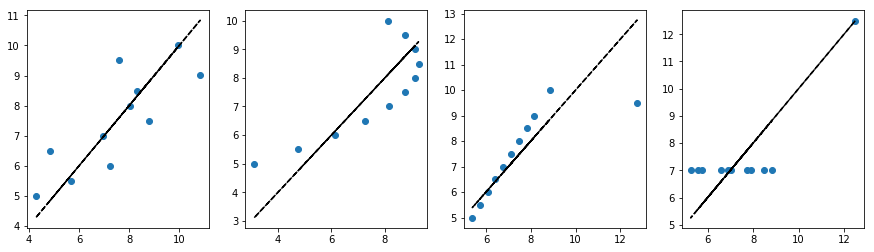

In [4]:
fig, axes = plt.subplots(1,4,figsize=(15,4))
yhat = m*x + b
axes[0].scatter(y1, yhat)
axes[0].plot(y1, y1, ls='--', color='k')
axes[1].scatter(y2, yhat)
axes[1].plot(y2, y2, ls='--', color='k')
axes[2].scatter(y3, yhat)
axes[2].plot(y3, y3, ls='--', color='k')
axes[3].scatter(y4, m*x4 + b)
axes[3].plot(y4, y4, ls='--', color='k')

We can also visualize the error distributions:

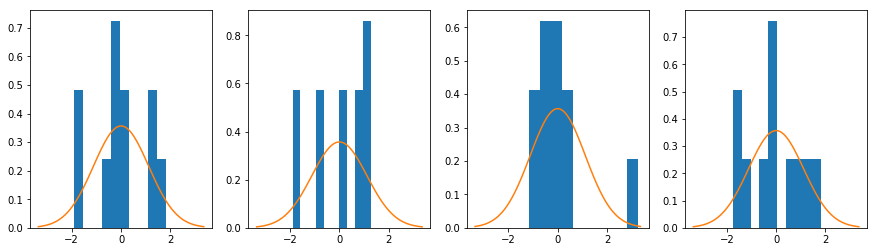

In [5]:
from scipy.stats import norm

fig, axes = plt.subplots(1,4,figsize=(15,4))
axes[0].hist(y1 - yhat,density=1)
axes[1].hist(y2 - yhat,density=1)
axes[2].hist(y3 - yhat,density=1)
axes[3].hist(y4 - (m*x4 + b),density=1)

mu = 0
sigma = np.std(y1 - yhat)
x_resid = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

for ax in axes:
    ax.plot(x_resid,norm.pdf(x_resid, mu, sigma))

### Question: Based on these sets of plots, which dataset is best described by linear regression?

## Adding features to improve performance

One strategy to improve regression models is to give them more information in the form of independent variables, or "features". Even without changing the underlying model, this can lead to considerable improvements in accuracy. We will consider two strategies in improving the features of regression models:

* Generating non-linear responses from "linear" models by creating *derived* features

* Adding new information about samples and analyzing the property of these independent variables

## Creating non-linear derived features for least-squared regression

We have already seen a classic example of this in previous lectures where we considered polynomial regression:

$y_j = b + m*x_j + p*x_j^2 + ...$

$y_j = \beta_0 + \beta_1 x_j + \beta_2 x_j^2 + \beta_3 x_j^3 + \beta_4 x_j^4 + ...$

$y_j = \sum_i^N \beta_i x_j^i$

We can think of this as "deriving" non-linear polynomial features from $x$, then using these new features in a linear least-squares regression model.

$x_j^{(k)} = x_j^k$

$y_j = \sum_k^N \beta_k x_j^{(k)} = \sum_k^N \beta_k x_{jk} \Rightarrow \vec{y} = \underline{\underline{X}}\vec{\beta}$

However, there is no reason that we have to use polynomials. To demonstrate this we will use the following three example datasets:

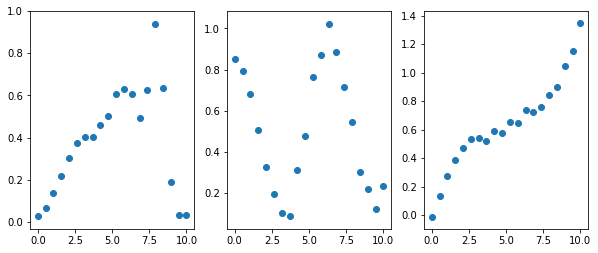

In [6]:
import pandas as pd

df = pd.read_csv('datasets/three_regression_examples.csv')
fig, axes = plt.subplots(1,3, figsize=(10, 4))
axes[0].scatter(df['0'], df['1'])
axes[1].scatter(df['0'], df['2'])
axes[2].scatter(df['0'], df['3'])

x = df['0'].values
y1 = df['1'].values
y2 = df['2'].values
y3 = df['3'].values

To start with, we will consider two types of "derived features":

* polynomials
* Gaussian distributions

We have already seen the "polynomial features" in a prior lecture:

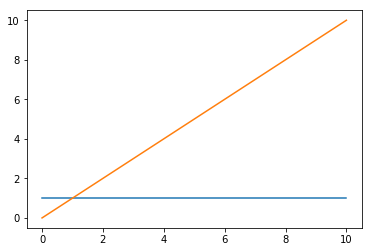

In [7]:
def polynomial_features(x, N):
    # function to return a matrix of polynomials for x to order N
    # One-liner uses "list comprehension" to iterate through range 0 - N (note N+1 since range function is not inclusive)
    # The input, x, is raised to the power of N for each value of N
    # The result is converted to an array and transposed so that columns correspond to features and rows correspond to data points (individual x values)
    return np.array([x**k for k in range(0,N)]).T

X_poly = polynomial_features(x,2)
fig,ax = plt.subplots()
for col in range(X_poly.shape[1]):
    ax.plot(x,X_poly[:,col])

Another alternative is to expand the function in terms of Gaussian (normal) distributions with evenly-spaced means and a fixed standard deviation:

$x^{(k)} = \exp{\left(-\frac{(x-x_k)^2}{2\sigma^2}\right)}$

where $x_k$ are the means and $\sigma$ is the standard deviation.

In [8]:
def gaussian_features(x, N , sigma = 1):
    # x is a vector
    # sigma is the standard deviation
    xk_vec = np.linspace(min(x), max(x), N)
    features = []
    for xk in xk_vec:
        features.append(np.exp(-((x - xk)**2/(2*sigma**2))))
    return np.array(features).T

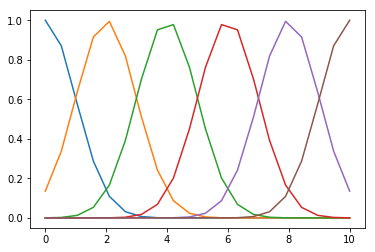

In [9]:
X_gauss = gaussian_features(x,6)
fig,ax = plt.subplots()
for col in range(X_gauss.shape[1]):
    ax.plot(x,X_gauss[:,col])

Now we have several strategies for creating non-linear derived features from the input. Let's see how they work on the example datasets. We will use our linear regression functions from last lecture. You should know how to derive these!

In [10]:
from  scipy.linalg  import solve
def multilinear_regression(X,y):
    ## Derive expression
    A = np.dot(X.T, X)
    b = np.dot(X.T, y)
    beta = solve(A,b)
    return beta

def multilinear_prediction(X,beta):
    return np.dot(X, beta)

/home/aj/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.241399e-32
  


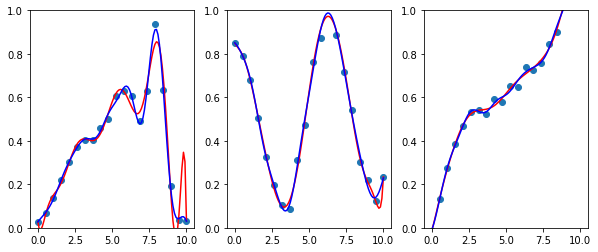

In [11]:
N = 15 #<- Number of features

# Generate features
X_poly = polynomial_features(x,N)
X_gauss = gaussian_features(x,N)

#plot the original data
fig, axes = plt.subplots(1,3, figsize=(10, 4))
axes[0].scatter(x, y1)
axes[1].scatter(x, y2)
axes[2].scatter(x, y3)

# Iterate through feature options
X_features = [X_poly, X_gauss]
feature_functions = [polynomial_features,  gaussian_features]
colors = ['r','b']

x_dense = np.linspace(min(x),max(x),100)

for yi, ax in zip([y1, y2, y3], axes):
    for X, f_features, color in zip(X_features,feature_functions,colors):#<- useful way to iterate through synced lists
        beta = multilinear_regression(X, yi)
        X_dense = f_features(x_dense,N)
        yhat = multilinear_prediction(X_dense,beta)
        ax.plot(x_dense, yhat, color=color, ls='-')
    ax.set_ylim([0,1])

### Question: Does N > 10 provide a reliable model? Why?

## Colinearity of features

Let's take a closer look at the properties of the features that we generated by investigating their covariance. We can get an intuitive feel for this by plotting them against each other:

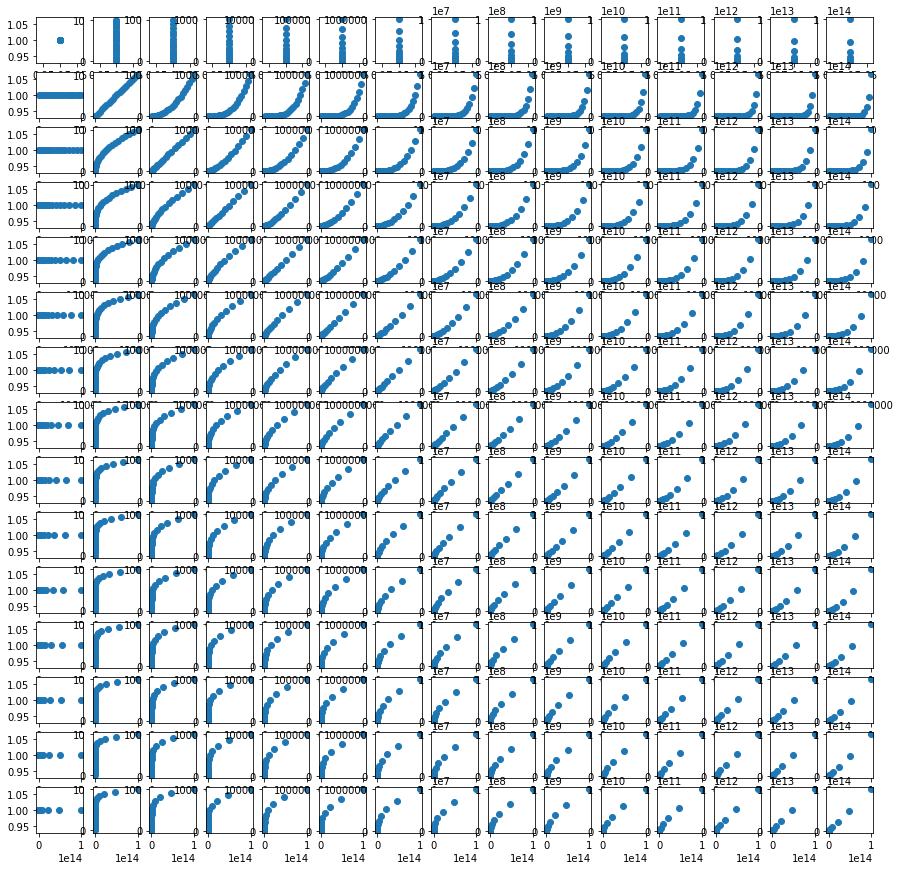

In [12]:
fig, axes = plt.subplots(N,N, figsize = (15,15))
X = X_poly

for i in range(N):
    for j in range(N):
        xi = X[:,i]
        xj = X[:,j]
        axes[i,j].scatter(xi, xj)


We can get a clearer picture by looking at the covariance matrix:

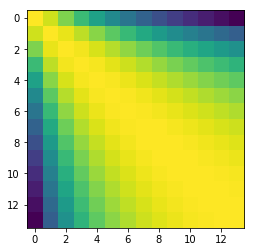

In [13]:
X_scaled = (X[1:,1:] - X[1:,1:].mean(axis=0))/X[1:,1:].std(axis=0)
covar = np.cov(X_scaled.T)
fig,ax = plt.subplots()
ax.imshow(covar)

The polynomial features are highly correlated. This causes numerical issues for multi-linear regression since the system of equations becomes nearly redundant. This is the linear algebra equivalent of (almost) dividing by zero. Let's take a look at the coefficient values:

/home/aj/Software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.241399e-32
  


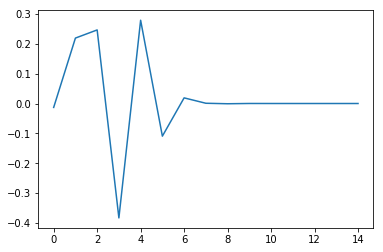

In [14]:
fig,ax = plt.subplots()
beta = multilinear_regression(X, y3)
ax.plot(range(0,N),beta)

We will look at two basic strategies for "stabilizing" the model:

1) Ortogonalization of feature vectors

2) Regularization of coefficients through the loss function

### Orthogonalizing coefficients

Now we know that co-linear features cause unpredictable behavior in the model, so one strategy is to ensure that features are not co-linear. For derived features, we can enforce this when we create the feature set. A classic example is "Legendre Polynomials" which are an orthogonal polynomial basis set:

$L_n(x) = \frac{1}{2^n n!}\frac{\mathrm{d}^n}{\mathrm{d}x^n}(x^2 - 1)^n $

$L_0(x) = 1$

$L_1(x) = x$

$L_2(x) = \frac{1}{2} (3x^2 -1)$

$L_3(x) = \frac{1}{2} (5x^3 - 3x)$

...

Luckily these are implemented in `numpy`.

In [15]:
from numpy.polynomial.legendre import legval

def legendre_features(x, N):
    features = []
    for k in range(1,N+1):
        alphas = np.zeros(k)
        alphas[-1] = 1 #<- this gives us the kth legendre polynomial (see docs for legval)
        x_normed = (x - min(x))/(max(x) - min(x))
        x_normed = x_normed*2 - 1
        features.append(legval(x_normed, alphas))
    return np.array(features).T

We can compare the Legendre polynomials with regular polynomials:

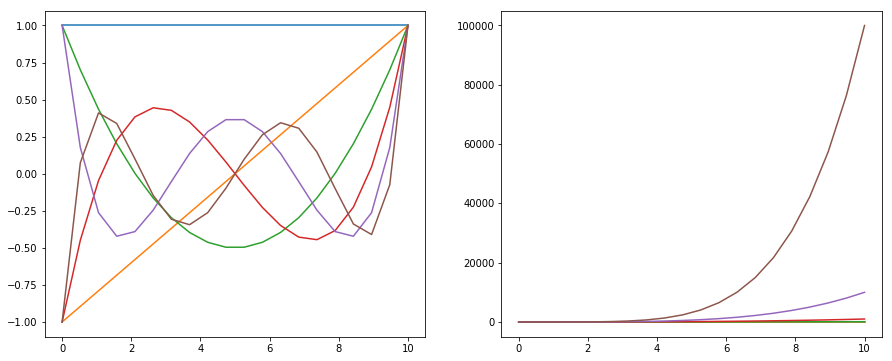

In [16]:
fig, axes = plt.subplots(1,2, figsize=(15,6))
N = 6
X_poly = polynomial_features(x,N)
X_leg = legendre_features(x,N)

for col in range(X_leg.shape[1]):
    axes[0].plot(x,X_leg[:,col])

for col in range(X_poly.shape[1]):
    axes[1].plot(x,X_poly[:,col])

We can verify that they are orthogonal by checking the covariance:

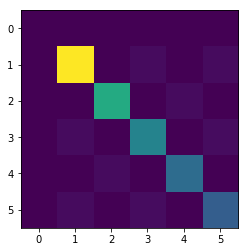

In [17]:
x_dense = np.linspace(min(x),max(x),100) #<- note that they will not be exactly orthogonal due to numerical issues, but as X gets more dense they become more orthogonal.
X_leg = legendre_features(x_dense,N)
cov_leg = np.cov(X_leg.T)

fig,ax = plt.subplots()
ax.imshow(cov_leg)

Generating orthogonal features is an elegant solution, but it isn't always practical. It is not always obvious how to determine the form of an orthogonal basis, and more importantly not all features are derived. Often features are "observed", not derived, so it is impossible to ensure that they are orthogonal.

Fortunately, we have a solution. Remember that principal component analysis (PCA) gives us orthonormal eigenvectors of the covariance matrix. These eigenvectors can be used as features!

We can use PCA to create a set of orthogonal features from our Gaussian kernel basis set. We just need to remember that the principal component vectors are **eigenvectors of the covariance matrix**.

(15, 15)


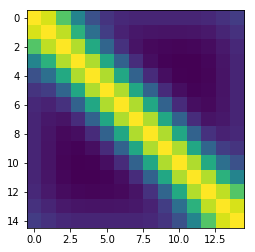

In [18]:
X_scaled = (X_gauss - X_gauss.mean(axis=0))/X_gauss.std(axis=0)
covar = np.cov(X_scaled.T)
eigvals, eigvecs = np.linalg.eig(covar)
print(eigvecs.shape)
fig,ax = plt.subplots()
ax.imshow(covar)

Now we can project the original feature space onto the eigenvector space using a dot product:

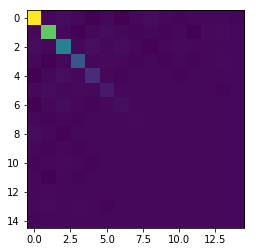

In [19]:
X_gauss_PCA = np.dot(X_gauss, eigvecs)
covar = np.cov(X_gauss_PCA.T)
fig,ax = plt.subplots()
ax.imshow(covar)

Now our features are not only orthogonal, but they are also ordered by the amount of variance they explain. This provides a very convenient way to generate features for regression models. We can create a `PCA_features` function to do this for any given set of features:

In [20]:
def PCA_features(X):
    X_scaled = (X - X.mean(axis=0))/X.std(axis=0)
    covar = np.cov(X_scaled.T)
    eigvals, eigvecs = np.linalg.eig(covar)
    return np.dot(X, eigvecs)

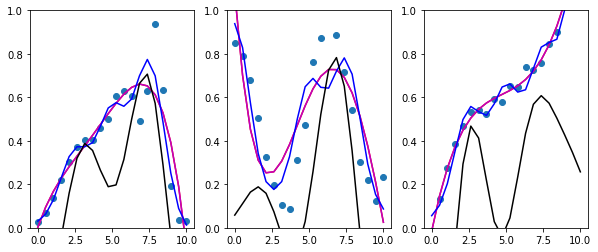

In [21]:
N = 5 #<- Number of features

# Generate features
X_poly = polynomial_features(x,N)
X_leg = legendre_features(x,N)
X_gauss = gaussian_features(x,N)

X_gauss_full = gaussian_features(x,len(x)) #<- first create a lot of Gaussians
X_gauss_PCA = PCA_features(X_gauss_full)[:,:N] #<- select the first N principal components


#plot the original data
fig, axes = plt.subplots(1,3, figsize=(10, 4))
axes[0].scatter(x, y1)
axes[1].scatter(x, y2)
axes[2].scatter(x, y3)

# Iterate through feature options
X_features = [X_poly, X_leg, X_gauss, X_gauss_PCA]
colors = ['r','m','b','k']

x_dense = np.linspace(min(x),max(x),100)

for yi, ax in zip([y1, y2, y3], axes):
    for X,  color in zip(X_features,colors):#<- useful way to iterate through synced lists
        beta = multilinear_regression(X, yi)
        yhat = multilinear_prediction(X,beta)
        ax.plot(x, yhat, color=color, ls='-')
    ax.set_ylim([0,1])

As the number of features approaches the number of data points all models converge; however, the behavior at low N varies considerably.

### Question: Which of these choices of features is the *worst*? 

## Principal Component Regression and Partial Least Squares

Ultimately we want to not only numerically stabilize regression models, but also identify the simplest possible model (e.g. fewest number of features or parameters). We will explore two techniques for doing this:

* Principal component regression (PCR) - determine principal component(s) that give the best fit.

* Partial least squares (PLS) - determine the linear combinations of principal components that maximize covariance between inputs and outputs.

We will look at a real data set of sensor data as an example.

The example [data set](https://archive.ics.uci.edu/ml/datasets/Air+Quality) consists of the raw output of metal oxide sensors for air pollutants in an Italian city. These metal oxide sensors are much cheaper than the standard sensors, but they are less accurate. The data set also includes measured concentrations from a calibrated sensor. The calibrated sensor will serve as the *ground truth*, and the goal is to determine the pollutant concentration based on the output of the metal oxide sensors. The units are mg/m$^3$ (CO), $\mu$g/m$^3$ (hydrocarbons, NO2), and ppb (NOx).

S. De Vito, E. Massera, M. Piga, L. Martinotto, G. Di Francia, [On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario](https://www.sciencedirect.com/science/article/pii/S0925400507007691?via%3Dihub), Sensors and Actuators B: Chemical, Volume 129, Issue 2, 22 February 2008, Pages 750-757, ISSN 0925-4005,

In [22]:
df = pd.read_excel('datasets/pollution_sensors.xlsx')
df.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
5,2004-03-10,23:00:00,1.2,1197.00,38,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,59.175000,0.784772
6,2004-03-11,00:00:00,1.2,1185.00,31,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,56.775000,0.760312
7,2004-03-11,01:00:00,1.0,1136.25,31,3.326677,672.00,62.0,1453.25,76.0,1332.75,729.50,10.675,60.000000,0.770238
8,2004-03-11,02:00:00,0.9,1094.00,24,2.339416,608.50,45.0,1579.00,60.0,1276.00,619.50,10.650,59.674999,0.764819
9,2004-03-11,03:00:00,0.6,1009.75,19,1.696658,560.75,-200.0,1705.00,-200.0,1234.75,501.25,10.250,60.200001,0.751657


Let's rename the columns to make life a little easier:

In [23]:
naming_dict = {'CO(GT)':'true_CO', 
               'PT08.S1(CO)':'SnOx_CO', 
               'NMHC(GT)':'true_hydrocarbon', 
               'C6H6(GT)':'true_benzene',
               'PT08.S2(NMHC)':'TiOx_hydrocarbon',
               'NOx(GT)':'true_NOx',
               'PT08.S3(NOx)':'WOx_NOx',
               'NO2(GT)':'true_NO2',
               'PT08.S4(NO2)':'WOx_NO2',
               'PT08.S5(O3)':'InOx_O3',
               'RH':'relative_humidity',
               'AH':'absolute_humidity'
              }
df = df.rename(columns=naming_dict)
df.head(5)

,Date,Time,true_CO,SnOx_CO,true_hydrocarbon,true_benzene,TiOx_hydrocarbon,true_NOx,WOx_NOx,true_NO2,WOx_NO2,InOx_O3,T,relative_humidity,absolute_humidity
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


Let's try to build a model to predict CO concentration. The simplest assumption is that CO concentration is correlated with the CO-targeted tin oxide (SnOx) sensor:

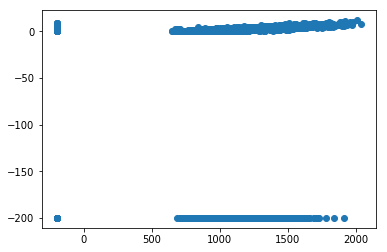

In [24]:
x = df['SnOx_CO'].values
y = df['true_CO'].values
fig, ax = plt.subplots()
ax.scatter(x,y)

We can see that there are some weird -200 values here. If you read the dataset description this is the default value for no data, so let's throw these datapoints out:

There are 7344 valid points


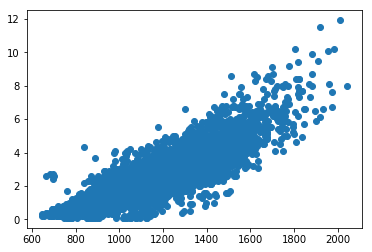

In [25]:
valids = np.logical_and(y>0, x>0)
x = x[valids]
y = y[valids]
print('There are {} valid points'.format(len(x)))
fig, ax = plt.subplots()
ax.scatter(x,y)

In this case the tin oxide (SnOx) sensor is a "feature" and the true CO concentration is the output. We can use this to create a baseline linear regression model. This time around we will do it with `scikit-learn` instead of our own functions:

0.7731538251295148
0.4903429117816155


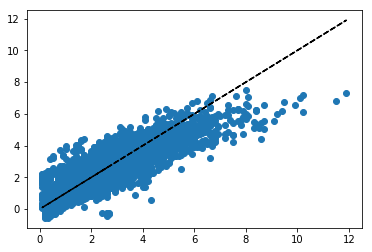

In [26]:
x = x.reshape(x.size,1)
intercept = np.ones((x.size,1))
X = np.append(intercept,x,1)
y = y.reshape(y.size,1)
beta = multilinear_regression(X, y)
yhat = multilinear_prediction(X,beta)
fig, ax = plt.subplots()

# make a parity plot
ax.scatter(y,yhat)
ax.plot(y,y,ls='--',color='k')

# print R^2
ybar = np.mean(y)
SST = np.sum((y-ybar)**2)
SSE = np.sum((y-yhat)**2)
print((SST - SSE) / SST)
# print MAE
print(np.mean(np.abs(y-yhat)))

### Question: What other features can we use?

In [27]:
df.head(5)

,Date,Time,true_CO,SnOx_CO,true_hydrocarbon,true_benzene,TiOx_hydrocarbon,true_NOx,WOx_NOx,true_NO2,WOx_NO2,InOx_O3,T,relative_humidity,absolute_humidity
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [28]:
names =['SnOx_CO', 'TiOx_hydrocarbon', 'WOx_NOx', 'WOx_NO2','InOx_O3', 'T', 'relative_humidity'] 
X = df[names]
y = df['true_CO']
X = X.values
y = y.values
valid_X = (X > 0).min(axis=1) #<- if any are false, this will be false
valids = np.logical_and(valid_X, y > 0)
valids = np.logical_and(valids, np.isfinite(X).all(axis=1)) #<- this removes inf and nan
X = X[valids, :]
y = y[valids]
intercept = np.ones((X.shape[0],1))
X = np.append(intercept, X, 1)
X_full = X.copy() #<- we will use X_full later when we want the original dataset

We can see how well a linear model works with all features:

0.8865402176138267
0.3237669245532467


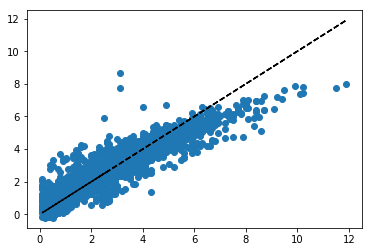

In [29]:
beta = multilinear_regression(X, y)
yhat = multilinear_prediction(X,beta)
fig, ax = plt.subplots()

# make a parity plot
ax.scatter(y,yhat)
ax.plot(y,y,ls='--',color='k')


# print R^2
ybar = np.mean(y)
SST = np.sum((y-ybar)**2)
SSE = np.sum((y-yhat)**2)
print((SST - SSE) / SST)
# print MAE
print(np.mean(np.abs(y-yhat)))

The accuracy is improved, but do we really need all the features? We can check the covariance structure:

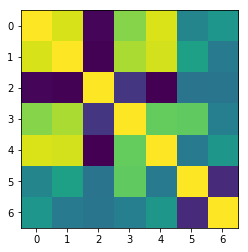

In [30]:
X_scaled = (X[1:,1:] - X[1:,1:].mean(axis=0))/X[1:,1:].std(axis=0)
covar = np.cov(X_scaled.T)
fig,ax = plt.subplots()
ax.imshow(covar)

Clearly there are some co-linear features here. We can use PCA to form orthogonal feature sets. This time we will use `scikit-learn` instead of our own function:

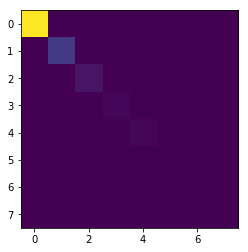

In [31]:
from sklearn.decomposition import PCA

PC_model = PCA(n_components=X.shape[1])
PC_model.fit(X)
X_PCA = PC_model.transform(X)

covar = np.cov(X_PCA.T)
fig,ax = plt.subplots()
ax.imshow(covar)

Now we can construct a linear regression model with the first `N` principal component features. We will use the `scikit-learn` linear model instead of our own:

R^2 0.8057789248975364
MAE 0.4652228408037737


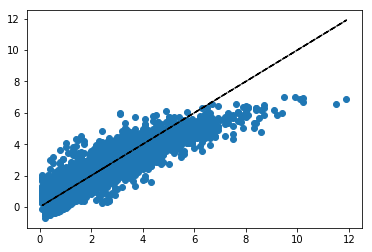

In [32]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
N = 3

X = X_PCA[:,:N]

lr.fit(X,y)
yhat = lr.predict(X)
fig, ax = plt.subplots()

# make a parity plot
ax.scatter(y,yhat)
ax.plot(y,y,ls='--',color='k')

# print R^2
print('R^2', lr.score(X,y))
# print MAE
print('MAE', np.mean(np.abs(y-yhat)))

### Question: Which principal component improves the model the most?

The PCA decomposition maximizes **variance within the feature space** along each orthogonal vector. However, what we really want is to maximize the **covariance between the features and the output**. This can be achieved with partial least squares, or PLS.

We won't go into the math of PLS, but conceptually it is a **supervised** alternative to PCA.

0.8795888672192012
1.5220043917245407


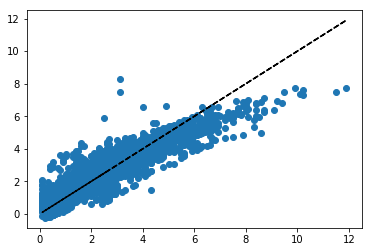

In [33]:
from sklearn.cross_decomposition import PLSRegression

N = 4
PLS = PLSRegression(n_components = N, scale=False) #<- N_components tells the model how many sub-components to select
PLS.fit(X_full,y) #<- we have to pass y into the fit function now
yhat = PLS.predict(X_full)

fig, ax = plt.subplots()

# make a parity plot
ax.scatter(y,yhat)
ax.plot(y,y,ls='--',color='k')

# print R^2
print(PLS.score(X_full,y))
# print MAE
print(np.mean(np.abs(y-yhat)))

### Question: How many components are needed to achieve an $R^2$ similar to the model that contains all features?

For a given number of components, the $R^2$ value of PLS will always be greater than PCA regression. For this reason PLS is typically preferred to PCA regression.

Note that the MAE is not always lower. Again, this highlights the importance of making a good choice for the accuracy metric when assessing a model.

## Regularization of Coefficients

All of the models we have seen so far are **parametric** - the number of parameters in the model does not depend on the number of data points. Parametric models are relatively straightforward to simplify by reducing the number of derived or observed features through linear combinations.

Another possibility is to use features that are derived from the data points themselves. We will consider two possibilities:

* Piecewise polynomials (or splines)
* Gaussian kernels

These are **non-parametric** models, and are much more susceptible to over-fitting. Simplifying them by removing feature terms is also not so intuitive, since it is equivalent to dropping specific data points. This is typically overcome by **regularizing** the coefficients of the model by including them in the loss function.

We will return to our original example datasets to illsutrate this.

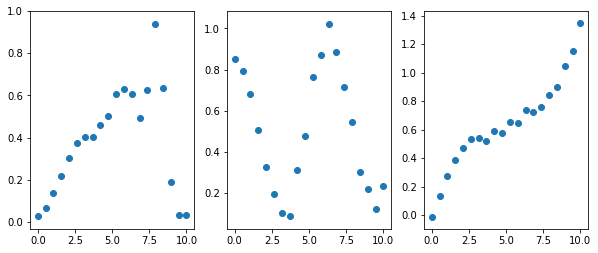

In [36]:
df = pd.read_csv('datasets/three_regression_examples.csv')
fig, axes = plt.subplots(1,3, figsize=(10, 4))
axes[0].scatter(df['0'], df['1'])
axes[1].scatter(df['0'], df['2'])
axes[2].scatter(df['0'], df['3'])

x = df['0'].values
y1 = df['1'].values
y2 = df['2'].values
y3 = df['3'].values

## Piecewise polynomials

Consider "features" of the form:

$x^{(k)} = max(0, x-x_k)^n$

where $x_k$ are the input data points and $n$ is the order of the polynomial.

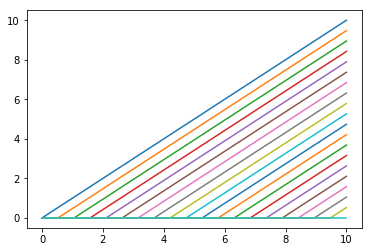

In [37]:
def piecewise_polynomial_kernel(x, order):
    features = []
    for xi in x:
        features.append(np.array([max(0,xj-xi)**order for xj in x]))
    return np.array(features).T

X_pieces = piecewise_polynomial_kernel(x,1)
fig,ax = plt.subplots()
for col in range(X_pieces.shape[1]):
    ax.plot(x,X_pieces[:,col])

Another possibility is to use Gaussian kernels centered at each data point:

$x^{(k)} = \exp{\left(-\frac{(x-x_k)^2}{2\sigma^2}\right)}$

Note that if $k=N$ and the data points are evenly spaced then this is equivalent to the Gaussian features from before.

ValueError: x and y must have same first dimension, but have shapes (7344, 1) and (1, 7344)

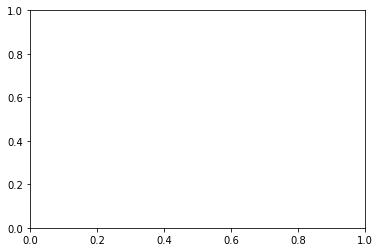

In [35]:
def gaussian_kernel(x, sigma = 1):
    # x is a vector
    # sigma is the standard deviation
    features = []
    for xk in x: #<- compare this to the function above
        features.append(np.exp(-((x - xk)**2/(2*sigma**2))))
    return np.array(features).T

X_kernel = gaussian_kernel(x,0.5)
fig,ax = plt.subplots()
for col in range(X_kernel.shape[1]):
    ax.plot(x,X_kernel[:,col])

In [ ]:
# Generate features
X_poly = piecewise_polynomial_kernel(x,2)
X_gauss = gaussian_kernel(x,0.5)

#plot the original data
fig, axes = plt.subplots(1,3, figsize=(10, 4))
axes[0].scatter(x, y1)
axes[1].scatter(x, y2)
axes[2].scatter(x, y3)

# Iterate through feature options
X_features = [X_poly, X_gauss]
feature_functions = [piecewise_polynomial_kernel,  gaussian_kernel]
colors = ['r','b']

x_dense = np.linspace(min(x),max(x),100)

lr = LinearRegression()

for yi, ax in zip([y1, y2, y3], axes):
    for X, f_features, color in zip(X_features,feature_functions,colors):#<- useful way to iterate through synced lists
        lr.fit(X, yi)
        X_dense = f_features(x_dense,N)
        yhat = lr.predict(X_dense)
        ax.plot(x_dense, yhat, color=color, ls='-')
    ax.set_ylim([0,1])